In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
import os
# 경로확인
print(os.getcwd())

/Users/jongmyng/Library/Mobile Documents/com~apple~CloudDocs/0.schoolfile/1.MOMENTUM/1기/수업자료/방학자료


In [180]:
# 타이타닉 데이터셋 로드
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [181]:
# train 데이터셋 정보 확인


 # 891개 행과 12개의 열

(891, 12)

In [182]:
 # test 데이터셋의 정보확인
 
 # 419개의 행과 11개의 열

(418, 11)

In [183]:
# 학습데이터의 결측치 확인

# 테스트 데이터의 결측치 확인


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Age 결측치 채우기

/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/4222946793.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

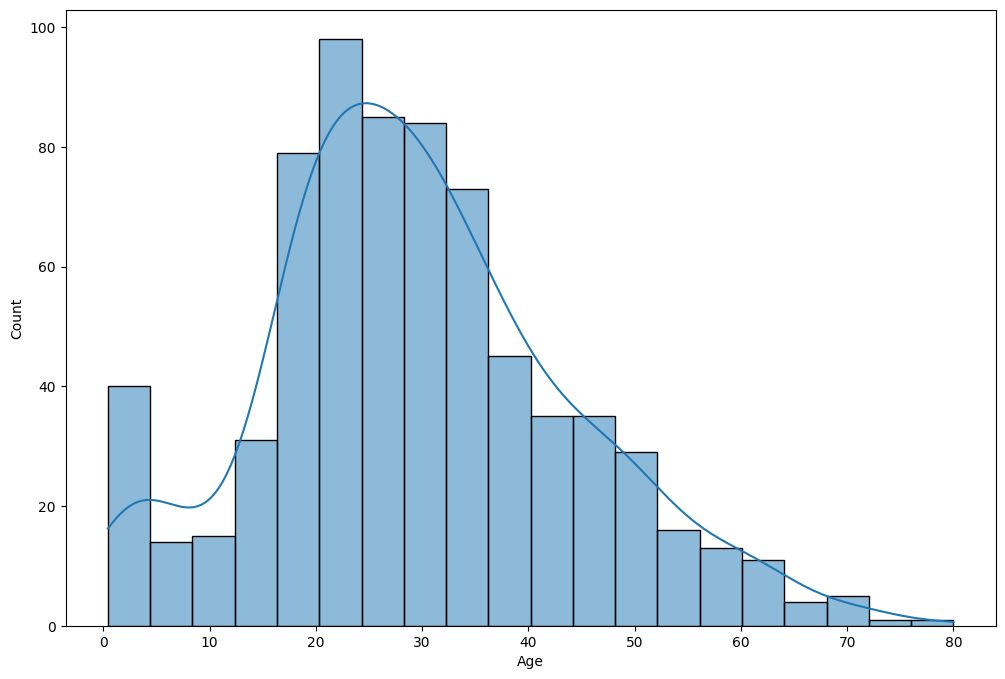

In [184]:
# Age열의 결측치 확인 및 평균 대체
plt.figure(figsize=(12, 8))
sns.histplot(train['Age'], kde=True)

# 정규분포와 유사한 분포를 가져 그냥 mean으로 대체하고 대체 되었는지 확인하기


In [185]:
# test의 Age도 train과 동일하게 결측치를 채워줌


/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/4091271777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(), inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Cabin 결측치 채우기

In [186]:
# Cabin 결측치 채우기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

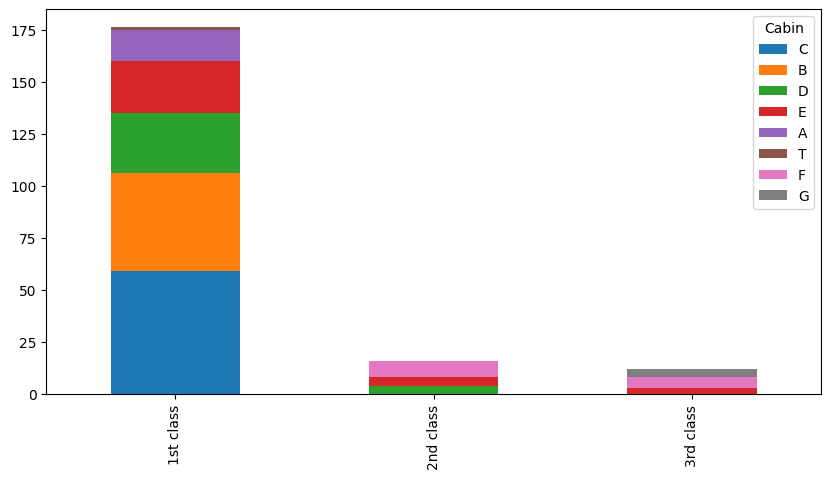

In [187]:
# Cabin은 Pclass별로 가장 많이 탑승한 객실을 기준으로 결측치를 채워줌
cabin_only = train[["Cabin", "Pclass"]].copy()

# Cabin의 앞글자만 따서 값을 대체해준다
cabin_only["Cabin"] = cabin_only['Cabin'].str[:1] 


Pclass1 = cabin_only[cabin_only['Pclass']==1]['Cabin'].value_counts() # 1등석의 객실
Pclass2 = cabin_only[cabin_only['Pclass']==2]['Cabin'].value_counts() # 2등석의 객실
Pclass3 = cabin_only[cabin_only['Pclass']==3]['Cabin'].value_counts() # 3등석의 객실


df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.show()

In [188]:
# train 데이터에서 1등석이면서 Cabin이 결측치면 'B'로 대체
# train 데이터에서 1등석이면서 Cabin이 결측치면 'E'로 대체
# train 데이터에서 1등석이면서 Cabin이 결측치면 'F'로 대체



# 아래 코드도 실행해주세요
train["Cabin"] = train["Cabin"].str.slice(0,1)

train.isnull().sum()    # 채워짐

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [189]:
# test의 Cabin 결측치도 같은 방식으로 채우기


test["Cabin"] = test["Cabin"].str.slice(0,1)

test.isnull().sum()    # 채워짐

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

# Embarked

In [190]:
# Embarked는 최빈값으로 대체

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train.isnull().sum()    # 채워짐

/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/1950336311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [191]:
# test의 Embarked도 최빈값으로 대체

test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test.isnull().sum()    # 채워짐

/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/1277729539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [192]:
# test의 Fare의 결측치는 Fare의 평균값으로 채워줌


/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/3780432262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [193]:
# 최종 train 데이터를 X와 y로 나누기
X = train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = train['Survived']


# Test 데이터는 PassengerId, Name, Ticket 열을 제외
X_test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


# 스케일링 & 라벨링


In [194]:
# train_test_split을 통해 학습 데이터와 검증 데이터를 나누기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((712, 8), (179, 8), (712,), (179,))

In [195]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,1,male,45.500000,0,0,28.5000,C,S
733,2,male,23.000000,0,0,13.0000,E,S
382,3,male,32.000000,0,0,7.9250,F,S
704,3,male,26.000000,1,0,7.8542,F,S
813,3,female,6.000000,4,2,31.2750,F,S
...,...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,7.6500,F,S
270,1,male,29.699118,0,0,31.0000,B,S
860,3,male,41.000000,2,0,14.1083,F,S
435,1,female,14.000000,1,2,120.0000,B,S


In [196]:
X_val

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,3,male,29.699118,1,1,15.2458,F,C
439,2,male,31.000000,0,0,10.5000,E,S
840,3,male,20.000000,0,0,7.9250,F,S
720,2,female,6.000000,0,1,33.0000,E,S
39,3,female,14.000000,1,0,11.2417,F,C
...,...,...,...,...,...,...,...,...
433,3,male,17.000000,0,0,7.1250,F,S
773,3,male,29.699118,0,0,7.2250,F,C
25,3,female,38.000000,1,5,31.3875,F,S
84,2,female,17.000000,0,0,10.5000,E,S


In [197]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [198]:
y_val

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [199]:
# 표준화 하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 스케일러를 통해서 X_train의 Age와 Fare를 스케일링해주세요  fit_transform 사용

# X_val또한 스케일링 해주세요



# test 데이터에도 동일한 스케일링 적용


In [200]:
# 순서가 있는 애들은 라벨인코딩을.
# 순서가 없는 애들은 원핫 인코딩을 진행한다.


# cabin과 embarked는 순서가 없는 애들이므로 원핫인코딩을 진행한다. 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# 각 인코더 따로 만들기
encoder_cabin = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # hadle_unknown='ignore'는 학습 데이터에 없는 값이 테스트 데이터에 있을 때 무시하도록 설정
encoder_embarked = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False는 희소 행렬이 아닌 일반 배열로 반환하도록 설정 걍 판다스로 붙이기 가능!

# Cabin 인코딩
cabin_encoded = encoder_cabin.fit_transform(X_train[['Cabin']])
cabin_encoded_val = encoder_cabin.transform(X_val[['Cabin']])
cabin_encoded_df = pd.DataFrame(cabin_encoded, columns=encoder_cabin.get_feature_names_out(['Cabin']), index=X_train.index)
cabin_encoded_val_df = pd.DataFrame(cabin_encoded_val, columns=encoder_cabin.get_feature_names_out(['Cabin']), index=X_val.index)

# Embarked 인코딩
embarked_encoded = encoder_embarked.fit_transform(X_train[['Embarked']])
embarked_encoded_val = encoder_embarked.transform(X_val[['Embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked']), index=X_train.index)
embarked_encoded_val_df = pd.DataFrame(embarked_encoded_val, columns=encoder_embarked.get_feature_names_out(['Embarked']), index=X_val.index)

# 원래 열 삭제하고 인코딩된 열 붙이기
X_train = X_train.drop(['Cabin', 'Embarked'], axis=1)
X_val = X_val.drop(['Cabin', 'Embarked'], axis=1)

X_train = pd.concat([X_train, cabin_encoded_df, embarked_encoded_df], axis=1)
X_val = pd.concat([X_val, cabin_encoded_val_df, embarked_encoded_val_df], axis=1)

# test 데이터에도 동일한 인코딩 적용
cabin_encoded_test = encoder_cabin.transform(X_test[['Cabin']])
embarked_encoded_test = encoder_embarked.transform(X_test[['Embarked']])
cabin_encoded_test_df = pd.DataFrame(cabin_encoded_test, columns=encoder_cabin.get_feature_names_out(['Cabin']), index=X_test.index)
embarked_encoded_test_df = pd.DataFrame(embarked_encoded_test, columns=encoder_embarked.get_feature_names_out(['Embarked']), index=X_test.index)
X_test = X_test.drop(['Cabin', 'Embarked'], axis=1)
X_test = pd.concat([X_test, cabin_encoded_test_df, embarked_encoded_test_df], axis=1)

# 최종적으로 인코딩된 train, validation, test 데이터 확인
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (712, 17)
X_val shape: (179, 17)
X_test shape: (418, 17)


In [201]:
# train , val, test 모두 성별은 남자는 1 여자는 0으로 변환


/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/877956053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Sex'].replace({'male': 1,
/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_25868/877956053.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Se

# 모델 선정하고 Fit 해보기

In [202]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # k값은 5로 설정

knn.fit(X_train, y_train)  # 학습 데이터로 모델 학습


# 검증 데이터로 예측
y_val_pred = knn.predict(X_val)


# 예측 결과 확인
# print("Validation Predictions:", y_val_pred)

# 정확도 평가
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_val_pred)  # accuacy_score(실제값, 예측값)

print("Train Accuracy:", knn.score(X_train, y_train))
print("Validation Accuracy:", accuracy)

Train Accuracy: 0.8693820224719101
Validation Accuracy: 0.8324022346368715


In [203]:
# logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)  # max_iter는 반복 횟수를 늘려서 수렴을 보장


# 학습하기


# 검증 데이터로 예측

# 예측 결과 확인
# print("Validation Predictions (Logistic Regression):", y_val_pred_log)

# 정확도 평가


Train Accuracy (Logistic Regression): 0.8103932584269663
Validation Accuracy (Logistic Regression): 0.7988826815642458


In [204]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)  # n_estimators는 트리의 개수


# 학습하기

# 검증 데이터로 예측

# 예측 결과 확인
# print("Validation Predictions (Random Forest):", y_val_pred_rf)

# 정확도 평가



Train Accuracy (Random Forest): 0.9831460674157303
Validation Accuracy (Random Forest): 0.8044692737430168


# 실제 Test 세트 predict 하고 제출해서 점수 보기

In [207]:
# KNN으로 test 데이터 예측
y_test_pred_knn = knn.predict(X_test)

# Logistic Regression으로 test 데이터 예측
y_test_pred_log = log_reg.predict(X_test)

# Random Forest으로 test 데이터 예측
y_test_pred_rf = rf.predict(X_test)

# 실제 Test 세트 predict 하고 제출해서 점수 보기
submission_knn = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred_knn
})
submission_knn.to_csv('submission_knn.csv', index=False) 

submission_log = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred_log
})
submission_log.to_csv('submission_log.csv', index=False)

submission_rf = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred_rf
})
submission_rf.to_csv('submission_rf.csv', index=False)

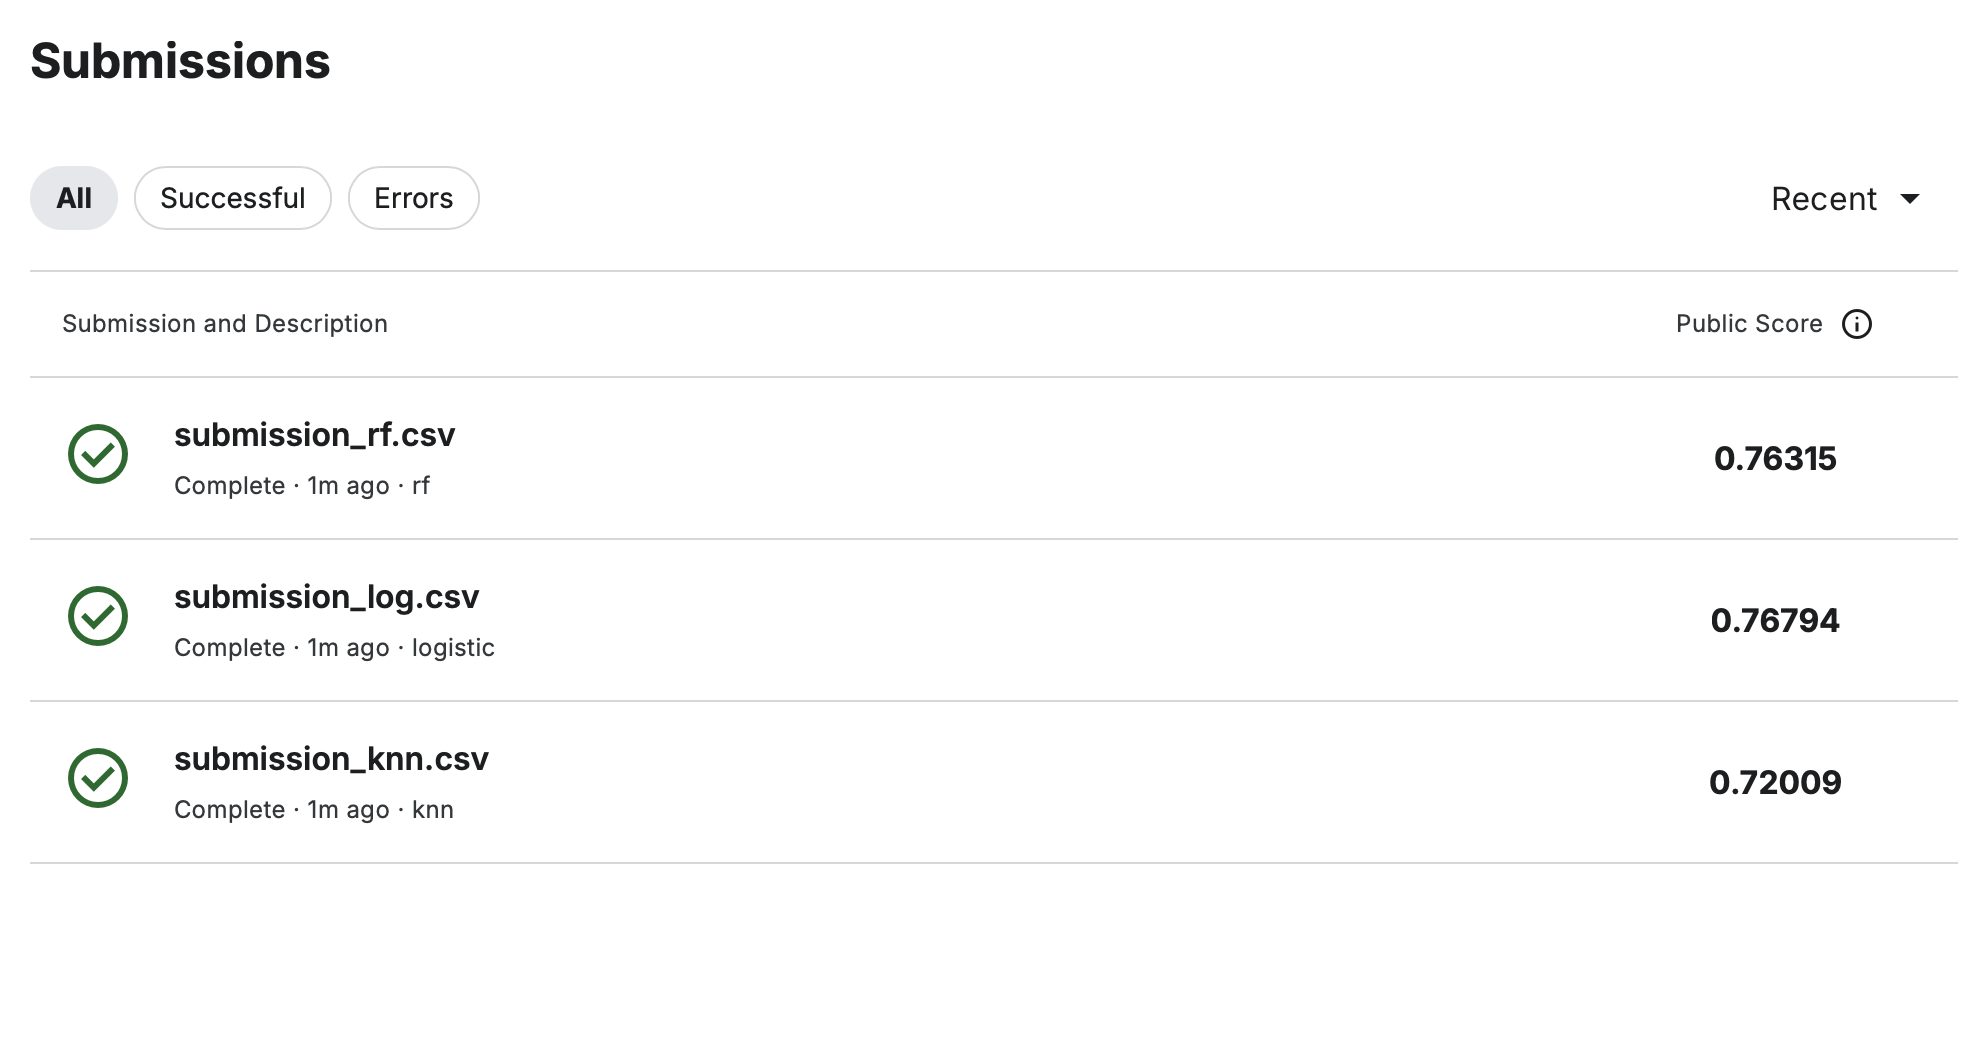

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 수치형 변수와 범주형 변수 지정
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

# 열별로 처리할 방법 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),        # 수치형은 스케일링
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # 범주형은 인코딩
    ]
)


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 전처리 + 모델을 묶은 파이프라인 생성
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# 학습
clf.fit(X_train, y_train)

# 예측
preds = clf.predict(X_val)




ValueError: A given column is not a column of the dataframe